In [22]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
data = pd.read_csv("/content/liver data.csv")
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
arr = data.select_dtypes(include = (['int64', 'float64'])).columns
for c in arr:
    data[c].fillna(data[c].median(), inplace=True)

arr.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [6]:
df_cat_col = data.select_dtypes(include=('object')).columns
for c in df_cat_col:
    data[c].fillna(data[c].mode().values[0], inplace=True)

data.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

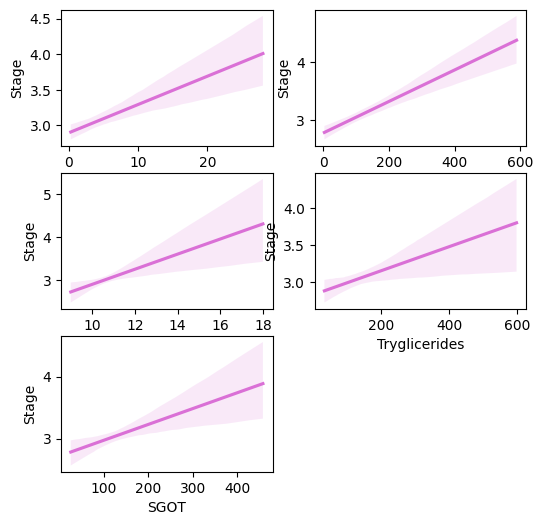

In [8]:
plt.figure(figsize = (6,6))
loop = data[["Bilirubin","Copper",'Prothrombin',"Tryglicerides","SGOT"]]
i = 0
for c in loop:
    i +=1
    plt.subplot(3,2,i)
    sn.regplot(x = data[c],y = data["Stage"],scatter=False, color='orchid',)


Text(0.5, 1.0, 'positive correlation of gender ("Female") with SGOT')

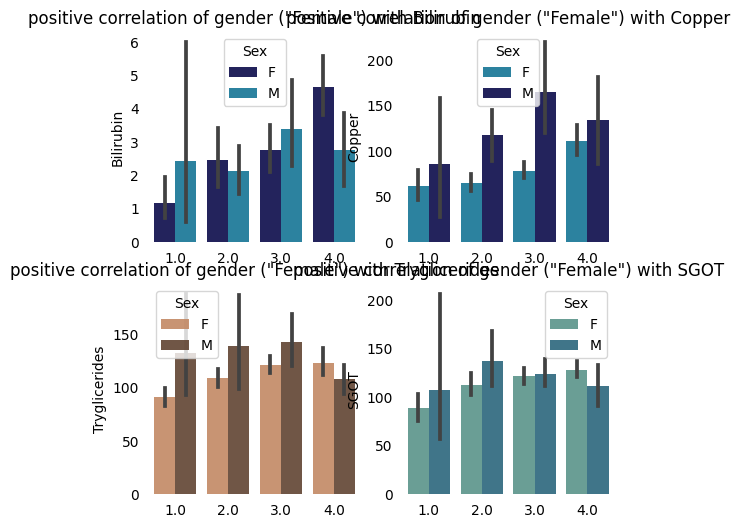

In [9]:
plt.figure(figsize=(6,6))



plt.subplot(2,2,1)
sn.barplot(x=data['Stage'],y = data["Bilirubin"],hue=data['Sex'], palette='ocean', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('positive correlation of gender ("Female") with Bilirubin')



plt.subplot(2,2,2)
sn.barplot(x=data['Stage'],y = data["Copper"],hue=data['Sex'], palette='ocean_r', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('positive correlation of gender ("Female") with Copper')





plt.subplot(2,2,3)
sn.barplot(x=data['Stage'],y = data["Tryglicerides"],hue=data['Sex'], palette='copper_r', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('positive correlation of gender ("Female") with Tryglicerides')


plt.subplot(2,2,4)
sn.barplot(x=data['Stage'],y = data["SGOT"],hue=data['Sex'], palette='crest', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('positive correlation of gender ("Female") with SGOT')



In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model  = RandomForestClassifier(n_estimators = 100,max_depth = 12,random_state = 0)
skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 10)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='lbfgs', max_iter=3000)

from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=10)

from sklearn.ensemble import BaggingClassifier
model4 = BaggingClassifier(
    n_estimators=100,oob_score=True)

In [15]:
import seaborn as sns

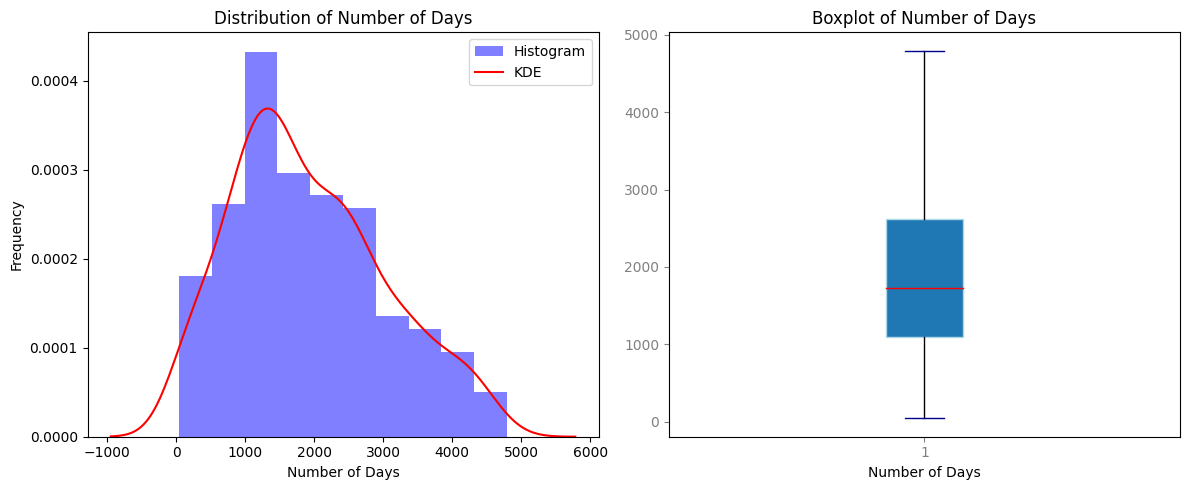

Mean number of days: 1917.7822966507176
Median number of days: 1730.0
Minimum number of days: 41
Maximum number of days: 4795


In [17]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram distribution of N_Days
axs[0].hist(data['N_Days'], density=True, alpha=0.5, color='blue', label='Histogram')
sns.kdeplot(data['N_Days'], color='red', ax=axs[0], label='KDE')

axs[0].set_title('Distribution of Number of Days')
axs[0].set_xlabel('Number of Days')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Define custom colors for the boxplot
box_color = 'lightblue'  # Color of the box
whisker_color = 'darkblue'  # Color of the whiskers
median_color = 'red'  # Color of the median line
flier_color = 'green'  # Color of the outliers

# Create a boxplot with custom colors
axs[1].boxplot(
    data['N_Days'],
    boxprops={'color': box_color},
    capprops={'color': whisker_color},
    medianprops={'color': median_color},
    flierprops={'markerfacecolor': flier_color, 'markeredgecolor': flier_color},
    patch_artist=True,  # Fill the box with color
)

axs[1].set_title('Boxplot of Number of Days')
axs[1].set_xlabel('Number of Days')

# Customize the x-axis and y-axis tick colors if needed
axs[1].tick_params(axis='x', colors='gray')
axs[1].tick_params(axis='y', colors='gray')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

mean_days = np.mean(data['N_Days'])
median_days = np.median(data['N_Days'])
min_days = np.min(data['N_Days'])
max_days = np.max(data['N_Days'])

print("Mean number of days:", mean_days)
print("Median number of days:", median_days)
print("Minimum number of days:", min_days)
print("Maximum number of days:", max_days)


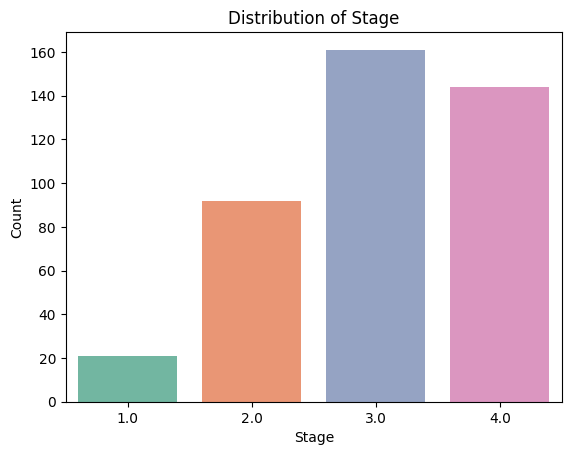

Death Rate: 38.52%.


In [18]:
sns.countplot(data=data, x='Stage', palette='Set2')
plt.title('Distribution of Stage')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

# Calculate death rate of patients
death = len(data[data.Status == 'D'])
death_rate = round((death / len(data))*100, 2)
print("Death Rate: "+ str(death_rate) + "%.")

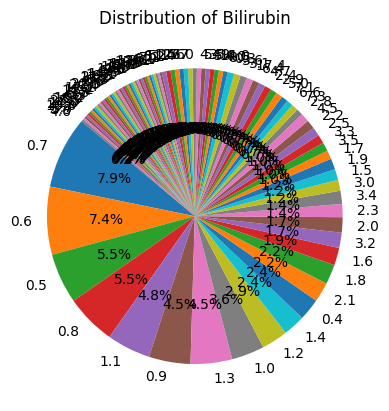

In [19]:
drug_counts = data['Bilirubin'].value_counts()

# Create a pie chart
plt.pie(drug_counts, labels=drug_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bilirubin')
plt.show()

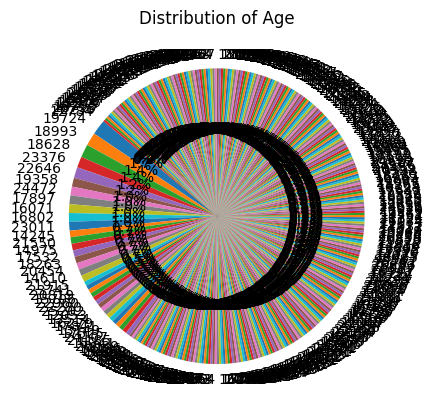

In [20]:
# Calculate the value counts for the 'Drug'
age_counts = data['Age'].value_counts()

# Create a pie chart
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age')
plt.show()

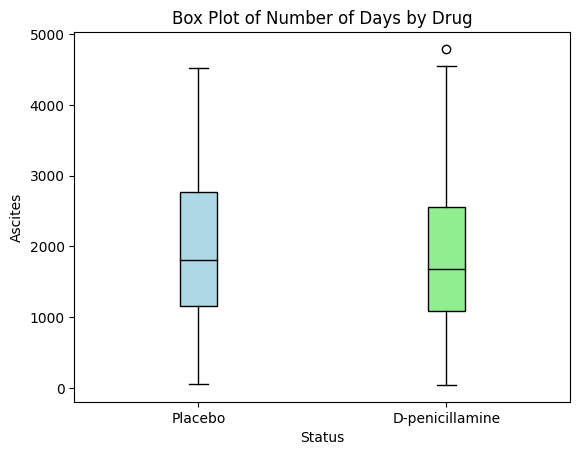

P-value: 0.2641
Fail to reject the null hypothesis: There is no significant difference between the number of days and drugs.


In [23]:
placebo_days = data['N_Days'][data['Drug'] == 'Placebo']
penicilline_days = data['N_Days'][data['Drug'] == 'D-penicillamine']

# Create a list of data to be plotted
data_to_plot = [placebo_days, penicilline_days]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
boxplot = ax.boxplot(data_to_plot, labels=['Placebo', 'D-penicillamine'], patch_artist=True)

# Customize boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customize the color of the median line
for median in boxplot['medians']:
    median.set_color('black')

# Add labels and title
ax.set_xlabel('Status')
ax.set_ylabel('Ascites')
ax.set_title('Box Plot of Number of Days by Drug')

# Show the plot
plt.show()
# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(placebo_days, penicilline_days)

# Print the results
print(f'P-value: {p_value:.4f}')

# Determine the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the number of days and drugs.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the number of days and drugs.")

In [24]:
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV

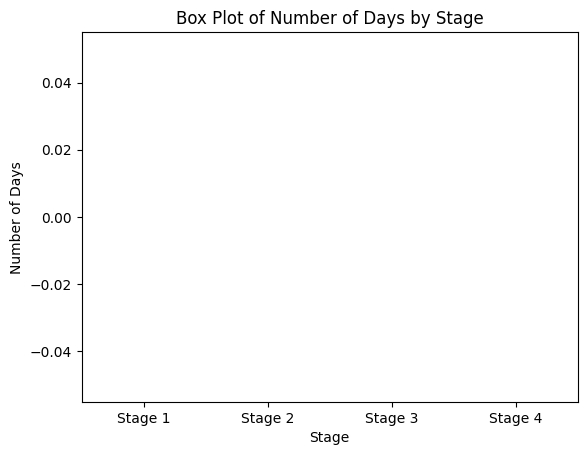

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


ANOVA F-statistic: nan
ANOVA p-value: nan
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   1.0    2.0  -264.9726 0.7126  -908.3219  378.3767  False
   1.0    3.0  -657.9089 0.0315 -1275.1066  -40.7112   True
   1.0    4.0 -1234.5595    0.0 -1855.9467 -613.1724   True
   2.0    3.0  -392.9363 0.0195  -740.6042  -45.2684   True
   2.0    4.0   -969.587    0.0  -1324.639 -614.5349   True
   3.0    4.0  -576.6506    0.0   -881.768 -271.5333   True
-----------------------------------------------------------


In [27]:
stage1_days = data['N_Days'][data['Stage'] == '1']
stage2_days = data['N_Days'][data['Stage'] == '2']
stage3_days = data['N_Days'][data['Stage'] == '3']
stage4_days = data['N_Days'][data['Stage'] == '4']

# Create a list of data to be plotted
data_to_plot = [stage1_days, stage2_days, stage3_days, stage4_days]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
boxplot = ax.boxplot(data_to_plot, labels=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], patch_artist=True)

# Customize boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customize the color of the median line
for median in boxplot['medians']:
    median.set_color('black')

# Add labels and title
ax.set_xlabel('Stage')
ax.set_ylabel('Number of Days')
ax.set_title('Box Plot of Number of Days by Stage')

# Show the plot
plt.show()

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(stage1_days, stage2_days, stage3_days, stage4_days)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')

# Perform Tukey's test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(data['N_Days'], data['Stage'])
print(tukey_results)


<ipython-input-29-75d5e7b8c528>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


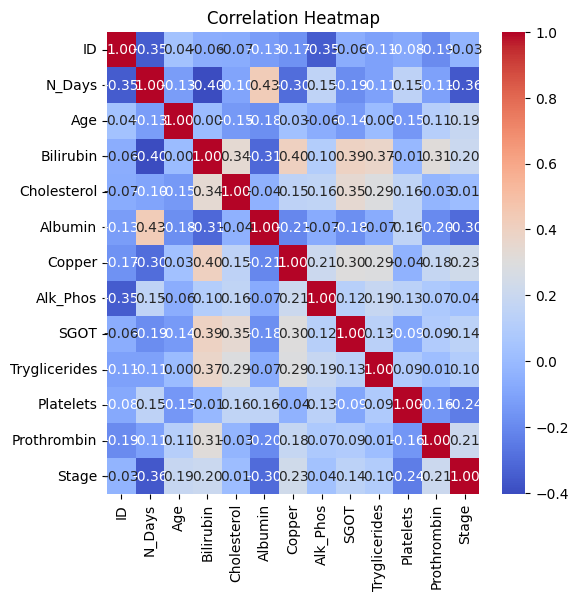

In [29]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()